[*********************100%%**********************]  1 of 1 completed
C:\Users\jpate\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0032
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 2.6888e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 1.4606e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 1.3552e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 1.3083e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 1.1135e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 9.7043e-05
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 9.1860e-05
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 8.4940e-05
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 9.4091e-05
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 8.9497e-05
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 8.7741e-05
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 8.0258e-05
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 7.4667e-05
Epoch 15/50
32/3

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


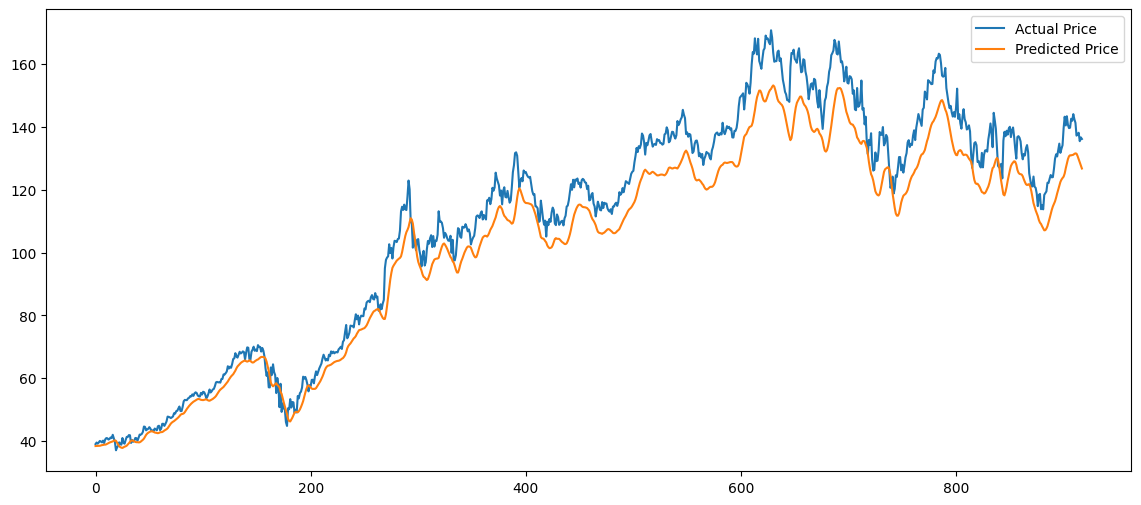

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Load Stock Data
stock = 'AAPL'  # Example: AAPL (Apple)
start_date = '2011-01-01'
end_date = '2023-03-01'

df = yf.download(stock, start=start_date, end=end_date)

# Preprocess Data
data = df['Close']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

training_data_len = int(len(scaled_data) * 0.70)
training_data = scaled_data[:training_data_len]

# Prepare Training Dataset
x_train, y_train = [], []
for i in range(100, len(training_data)):
    x_train.append(training_data[i-100:i])
    y_train.append(training_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=64, epochs=50)

# Save the Model
model.save('stock_dl_model.h5')

# Test Data Preparation
test_data = scaled_data[training_data_len - 100:]
x_test, y_test = [], []
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Make Predictions
y_predicted = model.predict(x_test)
y_predicted = y_predicted * (1 / scaler.scale_[0])
y_test = y_test * (1 / scaler.scale_[0])

# Plot Results
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_predicted, label='Predicted Price')
plt.legend()
plt.show()
